### A Deep Learning based Efficacy Prediction System for Drug Discovery

Here shows the demo for training process

In [1]:
########################################################
# All rights reserved. 
# Author: XIE Zhengwei @ Beijing Gigaceuticals Tech Co., Ltd 
#                      @ Peking University International Cancer Institute
# Contact: xiezhengwei@gmail.com
#
#
########################################################
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID" 
os.environ["CUDA_VISIBLE_DEVICES"] = "4"

from dleps_predictor2 import DLEPS

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Using TensorFlow backend.


In [2]:
dleps_p = DLEPS()
dleps_p.model[0].summary()

Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 277, 76)      0                                            
__________________________________________________________________________________________________
conv_1 (Conv1D)                 (None, 269, 9)       6165        input_4[0][0]                    
__________________________________________________________________________________________________
conv_2 (Conv1D)                 (None, 261, 9)       738         conv_1[0][0]                     
__________________________________________________________________________________________________
conv_3 (Conv1D)                 (None, 251, 10)      1000        conv_2[0][0]                     
______________

In [3]:
import h5py

h5f = h5py.File('../../data/SMILE_train_demo2.h5', 'r')
smile_train = h5f['data'][:]
h5f2 = h5py.File('../../data/SMILE_test_demo2.h5', 'r')
smile_test = h5f2['data'][:]
h5f3 = h5py.File('../../data/appostasis_train_demo2.h5', 'r')
rna_train = h5f3['data'][:]
h5f4 = h5py.File('../../data/appostasis_test_demo2.h5', 'r')
rna_test = h5f4['data'][:]

print(rna_train.shape)
print(rna_test.shape)
print(smile_train.shape)
print(smile_test.shape)

(1026,)
(100,)
(1026, 277, 76)
(100, 277, 76)


In [4]:
his = dleps_p.train(smile_train, rna_train,(smile_test, rna_test), epochs=50,
                batch_size=16,
                shuffle=True,)


Train on 1026 samples, validate on 100 samples
Epoch 1/50
1026/1026 [==============================] - 2s 2ms/step - loss: 0.1516 - val_loss: 0.1409
Epoch 2/50
1026/1026 [==============================] - 2s 1ms/step - loss: 0.1471 - val_loss: 0.1405
Epoch 3/50
1026/1026 [==============================] - 2s 1ms/step - loss: 0.1434 - val_loss: 0.1395
Epoch 4/50
1026/1026 [==============================] - 2s 2ms/step - loss: 0.1444 - val_loss: 0.1389
Epoch 5/50
1026/1026 [==============================] - 2s 2ms/step - loss: 0.1449 - val_loss: 0.1385
Epoch 6/50
1026/1026 [==============================] - 2s 2ms/step - loss: 0.1435 - val_loss: 0.1387
Epoch 7/50
1026/1026 [==============================] - 2s 2ms/step - loss: 0.1411 - val_loss: 0.1379
Epoch 8/50
1026/1026 [==============================] - 2s 2ms/step - loss: 0.1404 - val_loss: 0.1374
Epoch 9/50
1026/1026 [==============================] - 2s 1ms/step - loss: 0.1382 - val_loss: 0.1373
Epoch 10/50
1026/1026 [===========

[[1.         0.22052069]
 [0.22052069 1.        ]]
0.04507069112753248


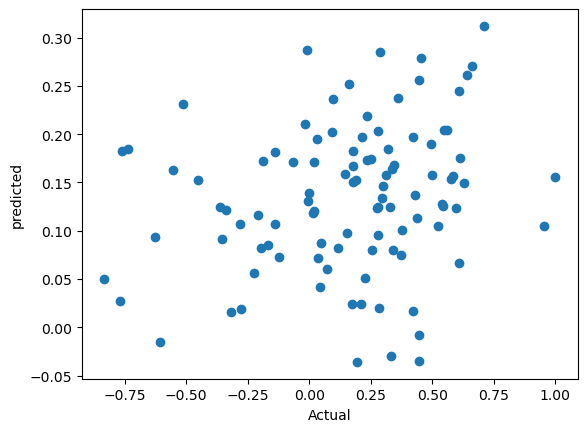

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
pred = dleps_p.model[0].predict(smile_test)
print(np.corrcoef(rna_test, pred.ravel()))
fig = plt.figure()
plt.scatter(rna_test, pred)
print(r2_score(rna_test, pred))
plt.xlabel('Actual')
plt.ylabel('predicted')
fig.set_facecolor("white")

In [6]:
### End

(1033, 277, 76)
(1033, 1)


/home/ranap/anaconda3/envs/tf1-gpu-DLEPS/lib/python3.7/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/home/ranap/anaconda3/envs/tf1-gpu-DLEPS/lib/python3.7/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/home/ranap/anaconda3/envs/tf1-gpu-DLEPS/lib/python3.7/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


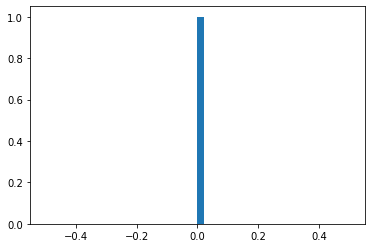

nan


In [7]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

y_pred = dleps_p.model[0].predict(smile_train)

corr = np.array([0.])

print(smile_train.shape)

print(y_pred.shape)
for i in range(smile_train.shape[0]):
    
    corr=np.hstack((corr,np.corrcoef(rna_train[i],y_pred[i])[0, 1]))
plt.hist(corr,50)
plt.show()
print(corr.mean())

In [8]:
from scipy.stats import gaussian_kde

def density(x,y):
    xy = np.vstack([x,y])
    return gaussian_kde(xy)(xy)

Training set

In [9]:
n = 10  # how many digits we will display
sam = 50
plt.figure(figsize=(20, 6))

with plt.style.context(['science','no-latex']):
    plt.figure(figsize=(20, 6))
    for i in range(10):
        # display original
        ax = plt.subplot(3, n, i + 1)

        plt.scatter(y_pred[sam+i],rna_train[sam+i],c=density(y_pred[sam+i],rna_train[sam+i]),s=8,cmap=plt.get_cmap("coolwarm"))
        ax = plt.subplot(3, n, i + 1*10+1)

        plt.scatter(y_pred[sam+i+10],rna_train[sam+i+10],c=density(y_pred[sam+i+10],rna_train[sam+i+10]),s=8,cmap=plt.get_cmap("coolwarm"))
        ax = plt.subplot(3, n, i + 1*20+1)

        plt.scatter(y_pred[sam+i+20],rna_train[sam+i+20],c=density(y_pred[sam+i+20],rna_train[sam+i+20]),s=8,cmap=plt.get_cmap("coolwarm"))


plt.tight_layout()
#plt.savefig('../analysis_plot/Figures/Train_Samples3_density.svg', format='svg')

OSError: 'science' not found in the style library and input is not a valid URL or path; see `style.available` for list of available styles

<Figure size 1440x432 with 0 Axes>

Analysis of Testing set

In [ ]:
y_pred2 = dleps_p.model[0].predict(smile_test)

corr = np.array([0.])

print(smile_test.shape)

print(y_pred2.shape)
for i in range(smile_test.shape[0]):
    corr=np.hstack((corr,np.corrcoef(rna_test[i],y_pred2[i])[0, 1]))
plt.hist(corr,50)
plt.show()
print(corr.mean())

Testing set

In [ ]:
n = 10  # how many digits we will display
sam = 50
with plt.style.context(['science','no-latex']):
    plt.figure(figsize=(20, 6))
    for i in range(10):
        # display original
        ax = plt.subplot(3, n, i + 1)

        plt.scatter(y_pred2[sam+i],rna_test[sam+i],s=8,c=density(y_pred2[sam+i],rna_test[sam+i]),cmap="coolwarm")
        ax = plt.subplot(3, n, i + 1*10+1)

        plt.scatter(y_pred2[sam+i+10],rna_test[sam+i+10],c=density(y_pred2[sam+i+10],rna_test[sam+i+10]),s=8,cmap=plt.get_cmap("coolwarm"))
        ax = plt.subplot(3, n, i + 1*20+1)

        plt.scatter(y_pred2[sam+i+20],rna_test[sam+i+20],c=density(y_pred2[sam+i+20],rna_test[sam+i+20]),s=8,cmap=plt.get_cmap("coolwarm"))


plt.tight_layout()
#plt.savefig('../analysis_plot/Figures/Test_Samples3_density.svg', format='svg')